# TKT4108 Structural Dynamics 2

## Solution Exercise 11

**Main topics:** Wind

**References:** Github examples, lecture notes


### Problem 1: Auto spectral density of wind turbulence

The one-sided auto-spectral density of the horizontal along wind component $u$ is defined as follows in the handbook N400 Design of bridges:

$$\frac{S_u(f)f}{\sigma_u^2} = \frac{ A_{u} \hat{f}_u}{\left(1+ 1.5 A_u \hat{f}_u  \right)^{\frac{5}{3}}} $$

$$\hat{f}_u = \frac{f {}^xL_u}{V} $$

where $f$ is the frequency in Hz.

**a)** Explain what the following symbols represent:

$$ \sigma_u^2 $$

$$ A_{u}  $$

$$\hat{f}_u$$

$$ {}^x{L_u} $$

**b)** The expression in N400 is defined using the frequency $n$ in Hz. Show that the equivalent expression for a frequency $\omega$ in $rad/s$ is defined by:

$$\frac{S_u(\omega)\omega}{\sigma_u^2} = \frac{ \frac{Au}{2\pi} \hat{\omega}_u}{\left(1+ 1.5 \frac{Au}{2\pi} \hat{\omega}_u  \right)^{\frac{5}{3}}} $$

Explain why it is necessary to ensure that the integral of the spectral density is the same for both definitions:

$$ \int_{-\infty}^{\infty} S_u(\omega) \:\text{d} \omega = \int_{-\infty}^{\infty} S_u(f) \:\text{d} f $$

**c)** Plot the normalized auto spectral density, which is defined as $\dfrac{S_u(f)f}{\sigma_u^2} $, as a function of $\hat{f}_{u}$.

Assume $A_u = 6.8$. Also, investigate how the auto-spectral density changes when $A_u$ increases and decreases by 20%.

Hint: use a loglog-axis.


### Problem 2: Co-spectral density of wind turbulence
The co-spectral density of the horizontal turbulence component $u$ for two points with a separation of $\Delta y$ meters is defined as

$$S_{u_1 u_2}(f,\Delta y) = S_u(f)\hat{Co}(f, \Delta y) $$

The coherence function is defined as

$$ \hat{Co}(f, \Delta y) =  \exp \left( - C_u \dfrac{ f \Delta y}{V} \right) $$

Assume that the mean wind velocity is $V=20$ m/s, the turbulence intensity is $I_u = 0.15$, the integral length scale $^xL_u = 100$ m, $A_u = 6.8$, and $C_u =10$.

**a)** Plot the co-spectral density of the turbulence components for the following separation distances: $\Delta y = \left[0, 10, 20 ,30 ,40, 50 \right]$. Use the expression for $S_u(f)$ from Problem 1.

**b)** Use the co-spectral density to calculate the correlation coefficient for the turbulence as a function of $\Delta y$. Plot the results and explain what you see.


### Problem 3: Recorded wind data

This problem considers wind data from two sensors on the Hardanger bridge. Download the file *wind_data_hardanger.txt*.

The time series $u_1$ and $u_2$ are measured wind velocities for two points that are $\Delta y=20$ m apart. The duration is 10 minutes.

**a**) Import the wind data using the code below. Find the mean wind velocity and the turbulence intensity for $u_1$ and $u_2$. Compare the values and comment upon whether the wind field is (approximately) homogeneous.

**b**) The wind data has a sample rate of $2$ Hz. Is this sufficient? Discuss briefly.

**c**) Estimate the auto spectral density of the turbulence for $u_1$ and $u_2$ using Welch's method and compare it to the expression in Problem 1. Set $A_u=6.8$ and $ {}^x{L_u}=180 $ m, and use $\sigma$ and $V$ as obtained directly from the data.

**d**) Calculate the correlation coefficient between $u_1$ and $u_2$. 

**e)** Estimate the cross-spectral density between $u_1$ and $u_2$ using Welch's method and compare it to the expression from Problem 2. Set $C_u=10$.


Length of time series in seconds:
600.0
Sample rate in Hz:
2.0


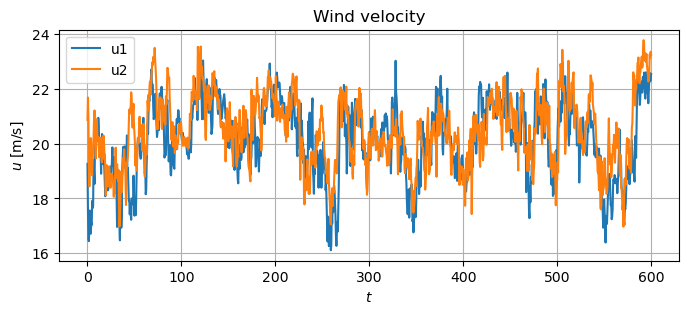

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal as spsi

t=np.loadtxt('wind_data_hardanger.txt',delimiter=',',skiprows=1, usecols=[0]).T # Import time vector

u=np.loadtxt('wind_data_hardanger.txt',delimiter=',',skiprows=1, usecols=range(1,3)).T # Import wind data

print('Length of time series in seconds:')
print(t[-1])

dt=t[2]-t[1]
fs=1/dt

print('Sample rate in Hz:')
print(fs)

plt.figure(figsize=(8,3))
plt.plot(t,u[0,:],label='u1')
plt.plot(t,u[1,:],label='u2')
plt.title('Wind velocity')
plt.ylabel('$u$ [m/s]')
plt.xlabel('$t$')
plt.grid()
plt.legend()


<br><br><br>
<br><br><br>

___

#### Hints

<br>


<details>
  <summary><b>▼ Problem 2</b></summary>

  <details style="margin-left:20px;">
    <summary>b)</summary>
    Lower correlation for greater distance 
  </details>

 
  </details>


<details>
  <summary><b>▼ Problem 3</b></summary>

  <details style="margin-left:20px;">
    <summary>a)</summary>
    Are their statistics equal?
  </details>
  
  <details style="margin-left:20px;">
    <summary>d)</summary>
    $\sim 65\%$ 
  </details>

 
  </details>